# Thompson Sampling

## Importing the libraries

In [122]:
# 08/01/2023
# IDE: VSC
# Section 33: Thompson Sampling
# Video [292, 295]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [123]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [124]:
# UCB figures it out in minimum >500 rounds
# In how many rounds can Thompson Sampling figure it out? Does it beat it?

total_users = 500 # rows (algo works with 500 rounds)
n_ads = 10 # columns
ads_selected = []


# Algorithm (Thompson_Sampling_Slide.png)

# Step 1. At each round n, we consider 2 numbers for each ad i:
#   N1_i(n) - the number of times the ad i got reward 1 up to round n
#   N0_i(n) - the number of times the ad i got reward 0 up to round n

numbers_of_rewards_1 = [0] * n_ads
numbers_of_rewards_0 = [0] * n_ads

total_reward = 0


for round in range(0, total_users):
    
    # ad: is the index of the ad that will be selected at the round 
    ad = 0
    max_phi = 0

    # Step 2. For each ad i, we take a random draw from the distribution below
    #   phi_i(n) = B(N1_i(n) + 1, N0_i(n) + 1)
    for i in range(0, n_ads):
        B = random.betavariate(numbers_of_rewards_1[i]+1, numbers_of_rewards_0[i]+1)

        # Step 3. We select the ad that has the highest phi_i(n)
        if (B > max_phi):
            max_phi = B
            ad = i 


    # updating the variables:
    ads_selected.append(ad)

    reward = dataset.values[round, ad]

    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1
        
    total_reward += reward

## Visualising the results - Histogram

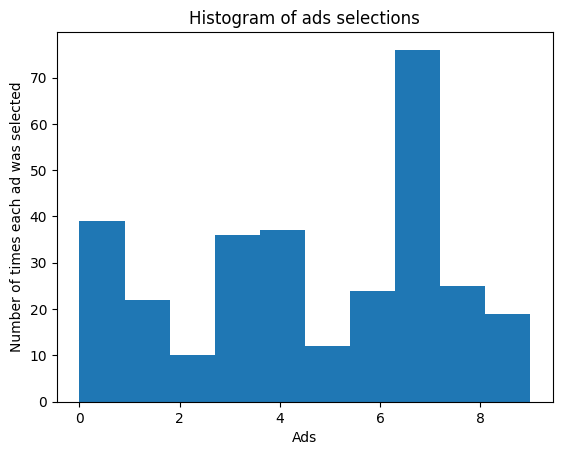

In [125]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()